In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import os

In [ ]:
plt.style.use('ggplot')

**Datei Import**

In [ ]:
Path ='/home/bjoern/Desktop/Nano_Rheology/cell_data/'
files=os.listdir(Path)
fil=files[1]

create data frame

In [ ]:
df=pd.read_csv(Path+fil)
df.columns
df.drop(u'Unnamed: 0',1,inplace=True)
print(df.head())
print(df.columns)


Invert x axis for indentation and limit the data to the indentation 

In [ ]:
extend=df[df['modus']=='extend']
x=-extend['measuredHeight'].values
y=extend['vDeflection'].values
print(x)
x_red=x[x>-0.1e-7]
y_red=y[x>-0.1e-7]


**fit function**

In [ ]:
theta=18
tanTheta=np.tan(theta*np.pi/180)

def sneddon(x, E, theta, nu, x0, F0):
    #theta=18
    tanTheta=np.tan(theta*np.pi/180)
    return (x-x0)**2*(E*2*tanTheta)/((1-nu**2)*np.pi)+F0  

fitting the sneddon model 

In [ ]:
nu=0.5
theta=18
boundary=([-10e3,-np.inf,-np.inf],[10e6, np.inf, np.inf])# does not work

popt,pcov=curve_fit(lambda x_red, E, x0, F0: sneddon(x_red, E, theta, nu, x0, F0),
                    x_red, y_red, p0=[10e6, 0, 0])#, bounds=boundary)

plots

[  1.99257375e+06  -4.63330756e-09   2.37474906e-11]


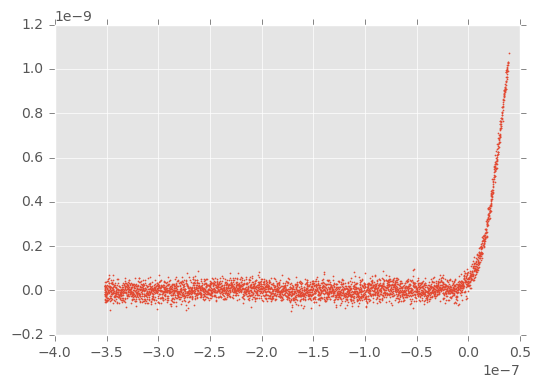

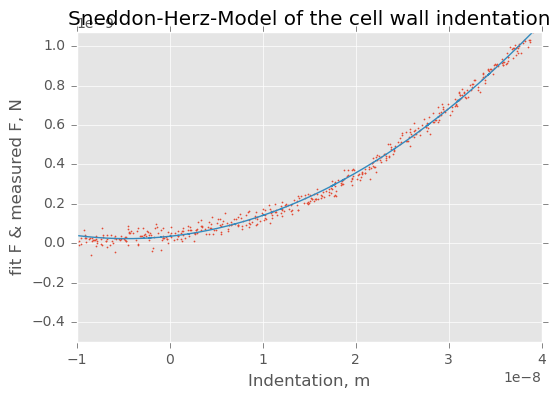

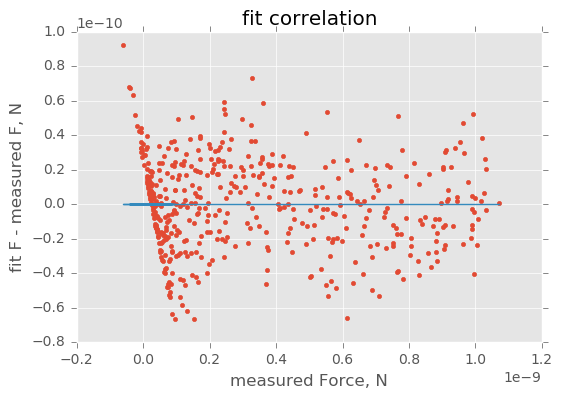

In [129]:
plt.figure(1)
plt.plot(x, y, '.', markersize=1.5)


plt.figure(2)
plt.plot(x_red, y_red, '.', markersize=1.5)
ax=plt.plot(x_red, sneddon(x_red, popt[0], theta, nu, popt[1], popt[2])) #sneddon(x, E, theta, nu, x0, F0, )
plt.ylim(-0.5e-9, np.amax(y))

#plot parameter
plt.title('Sneddon-Herz-Model of the cell wall indentation')
plt.xlabel('Indentation, m')
plt.ylabel('fit F & measured F, N')



y_sneddon=sneddon(x_red, popt[0], theta, nu, popt[1], popt[2])
#print(y_sneddon)


plt.figure(3)
#plot parameter
plt.title('fit correlation')
plt.xlabel('measured Force, N')
plt.ylabel('fit F - measured F, N')


plt.plot(y_red, y_sneddon-y_red, '.')
plt.plot(y_red, [0]*len(y_red))


